### Mortgage Loan Payment Formula

Definition:

``n``: Number of months of the mortgage payment

``M``: Monthly mortgage payment

``r``: Monthly interest rate

``P``: Principal

The formula is 
$$M = \frac{rP}{1 - (1+r)^{-n}}$$

First, we will not consider property taxes, PMI (private mortgage insurance), homeowner insurance, HOA for simplicity. Note that these variables are correlated with the housing price, and further the interest rate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calcMonthlyPayment(housing_price, down_payment_prop, annual_interest_rate, n):
    init_principal = (1 - down_payment_prop) * housing_price
    monthly_pay = annual_interest_rate/12 * init_principal / ( 1 - (1 + annual_interest_rate/12) ** (-n))

    curr_principal = [init_principal] * (n+1)
    interest = [1] * n
    cost = [1] * n
    # principal and interest of current month
    for i in range(n):
        interest[i] = curr_principal[i] * annual_interest_rate/12
        cost[i] = monthly_pay - interest[i]
        curr_principal[i+1] = curr_principal[i] - cost[i]
    
    return [init_principal, monthly_pay, curr_principal[:-1], interest, cost]

In [3]:
def calcTotalPayment(housing_price, down_payment_prop, annual_interest_rate, tax_rate, n):
    monthly_payment = calcMonthlyPayment(
        housing_price, 
        down_payment_prop, 
        annual_interest_rate, n
        )[1] + tax_rate/12 * housing_price
    total_payment = monthly_payment * n
    return total_payment

In [4]:
housing_price = 800000
down_payment_prop = 0.2
interest_rate = 0.065
n = 30 * 12

output = calcMonthlyPayment(housing_price, down_payment_prop, interest_rate, n)
monthly_payment = output[1]
total_payment = monthly_payment * n
print('When housing price is ${}'.format(housing_price), 
      ', the Initial Principal is ${}'.format(int(output[0])))
print('When housing price is ${}'.format(housing_price), 
      ', the Montly Interest Payment is ${}'.format(int(output[1])))
print('When housing price is ${}'.format(housing_price), 
      ', the Total Payment excluding property taxes is ${}'.format(int(total_payment)))

When housing price is $800000 , the Initial Principal is $640000
When housing price is $800000 , the Montly Interest Payment is $4045
When housing price is $800000 , the Total Payment excluding property taxes is $1456284


In [5]:
interest_rate_list = np.arange(0.02, 0.071, step=0.001)
total_payment_list = []
interest_payment_list = []
for i in range(len(interest_rate_list)):
    total_payment_list.append(
        calcTotalPayment(
            housing_price=housing_price, 
            down_payment_prop=down_payment_prop, 
            annual_interest_rate=interest_rate_list[i], 
            tax_rate=0.0219, # Ajustable
            n=n
        ))
    interest_payment_list.append(
        np.sum(calcMonthlyPayment(
            housing_price=housing_price, 
            down_payment_prop=down_payment_prop, 
            annual_interest_rate=interest_rate_list[i], 
            n=n)[3]))
df_interest = pd.DataFrame({
    'interest_rate': interest_rate_list, 
    'total_payment': np.round(total_payment_list, 1),
    'interest_payment': np.round(interest_payment_list, 1)
    })
df_interest

,interest_rate,total_payment,interest_payment
0,0.020,1377203.3,211603.3
1,0.021,1388771.0,223171.0
2,0.022,1400430.7,234830.7
3,0.023,1412182.2,246582.2
4,0.024,1424024.9,258424.9
5,0.025,1435958.6,270358.6
6,0.026,1447982.7,282382.7
7,0.027,1460096.9,294496.9
8,0.028,1472300.8,306700.8
9,0.029,1484593.9,318993.9


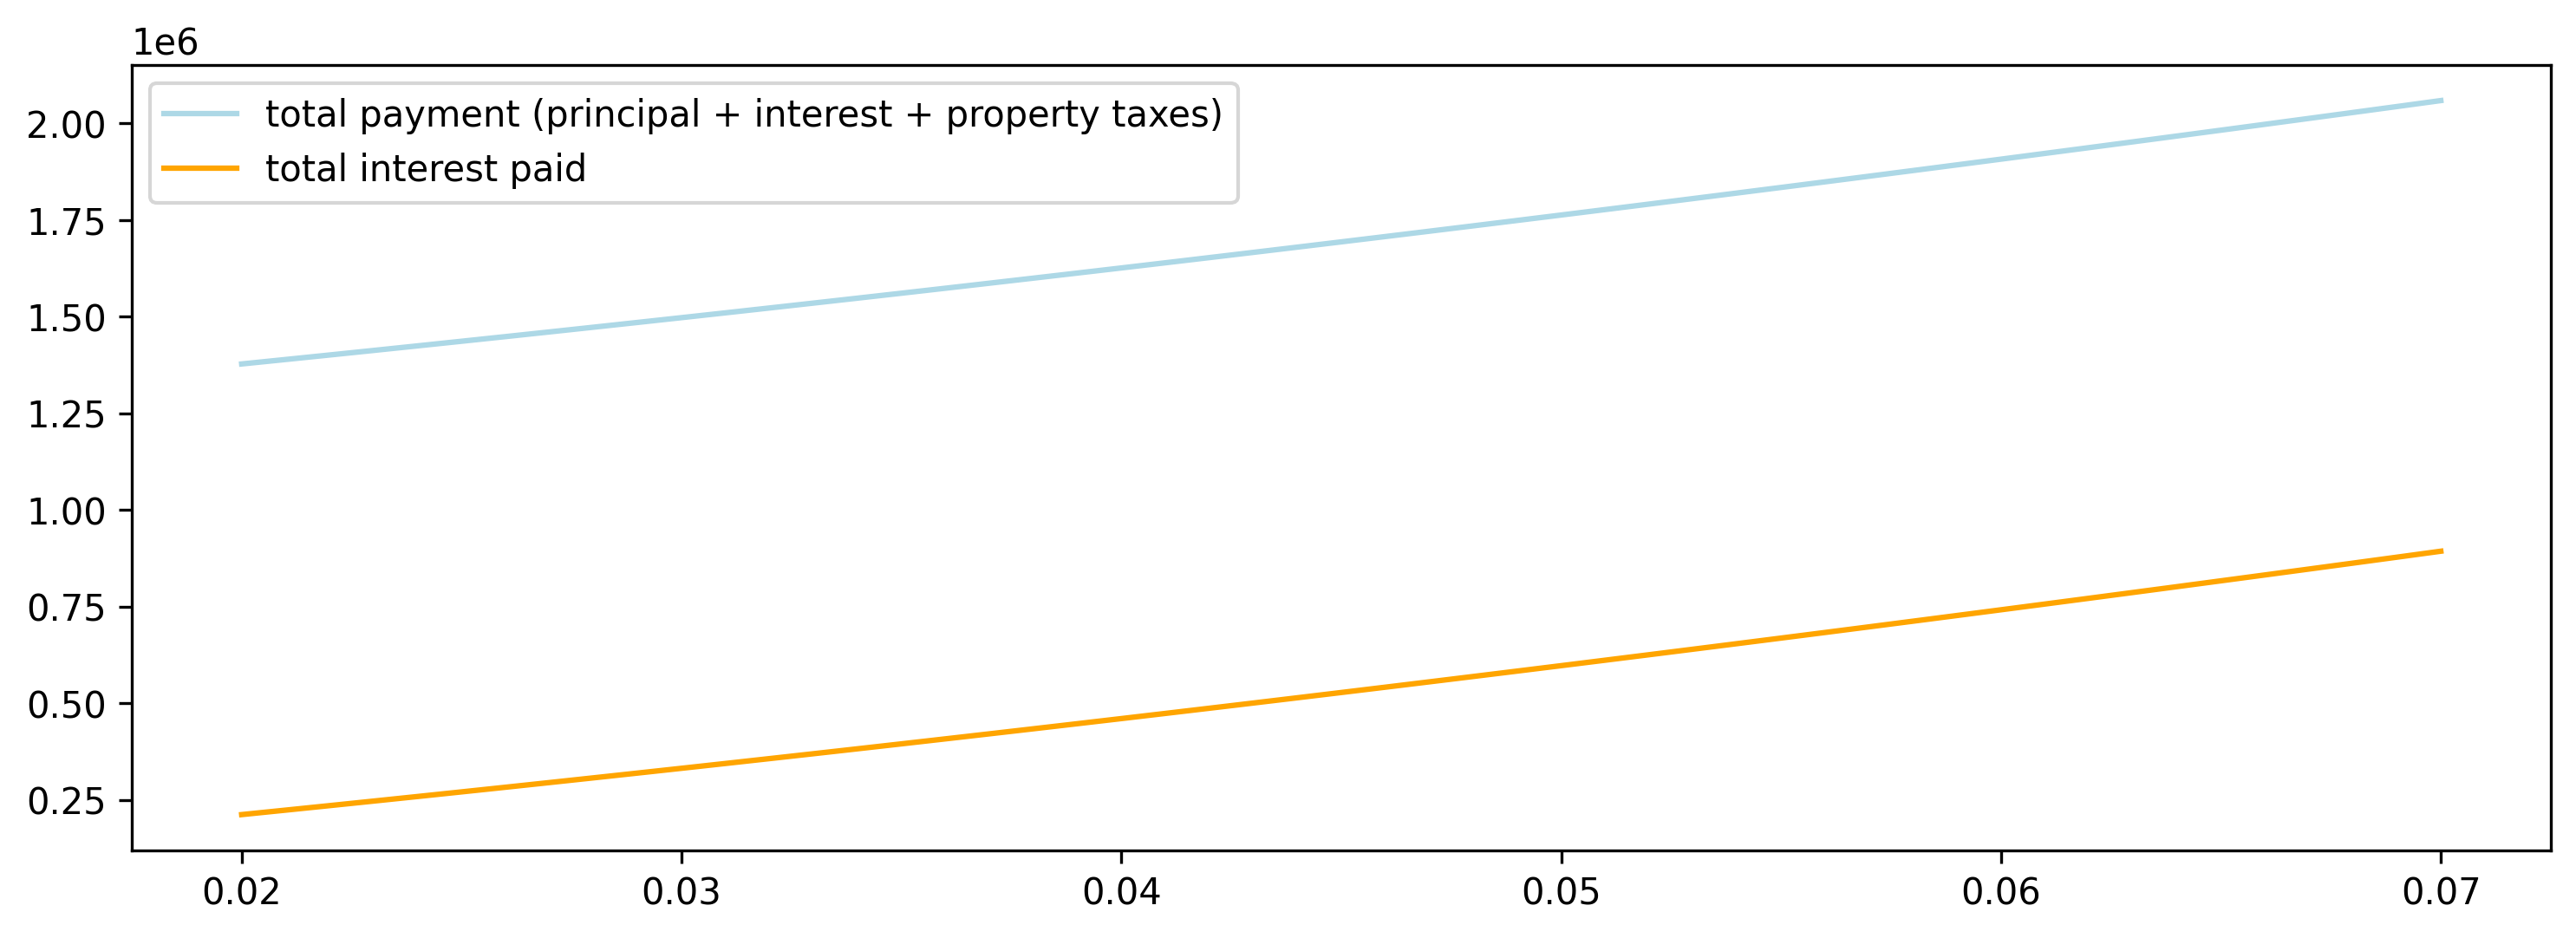

In [6]:
plt.figure(figsize=(12, 4), dpi=300)
plt.plot(df_interest.interest_rate, df_interest.total_payment, color='lightblue', 
        label='total payment (principal + interest + property taxes)')
plt.plot(df_interest.interest_rate, df_interest.interest_payment, color='orange', 
         label='total interest paid')
plt.legend()
plt.show()

In [7]:
# covert list of lists to pandas dataframe
df = pd.DataFrame(output[2:]).transpose()

# rename columns
df.columns = ['curr_principal','interest','principal']

# add the loan term and convert to datetime
idx = pd.date_range('2024-01-01 00:00:00', '2053-12-01 00:00:00', freq='MS')
df.insert(loc=0, column='loan_term', value=idx)
df.loan_term = pd.to_datetime(df.loan_term)

# add year for grouping
df['year'] = pd.DatetimeIndex(df['loan_term']).year
df.head(12)

,loan_term,curr_principal,interest,principal,year
0,2024-01-01,640000.000000,3466.666667,578.568684,2024
1,2024-02-01,639421.431316,3463.532753,581.702597,2024
2,2024-03-01,638839.728719,3460.381864,584.853486,2024
3,2024-04-01,638254.875232,3457.213908,588.021443,2024
4,2024-05-01,637666.853790,3454.028791,591.206559,2024
5,2024-06-01,637075.647231,3450.826422,594.408928,2024
6,2024-07-01,636481.238303,3447.606707,597.628643,2024
7,2024-08-01,635883.609660,3444.369552,600.865798,2024
8,2024-09-01,635282.743862,3441.114863,604.120488,2024
9,2024-10-01,634678.623374,3437.842543,607.392807,2024


In [8]:
df_annual = df.groupby('year')[['interest', 'principal']].sum()
df_annual.head(10)

,interest,principal
year,,
2024,41389.381203,7153.443001
2025,40910.301877,7632.522327
2026,40399.137721,8143.686483
2027,39853.739955,8689.084249
2028,39271.815891,9271.008313
2029,38650.919294,9891.904910
2030,37988.440103,10554.384102
2031,37281.593453,11261.230752
2032,36527.407973,12015.416231


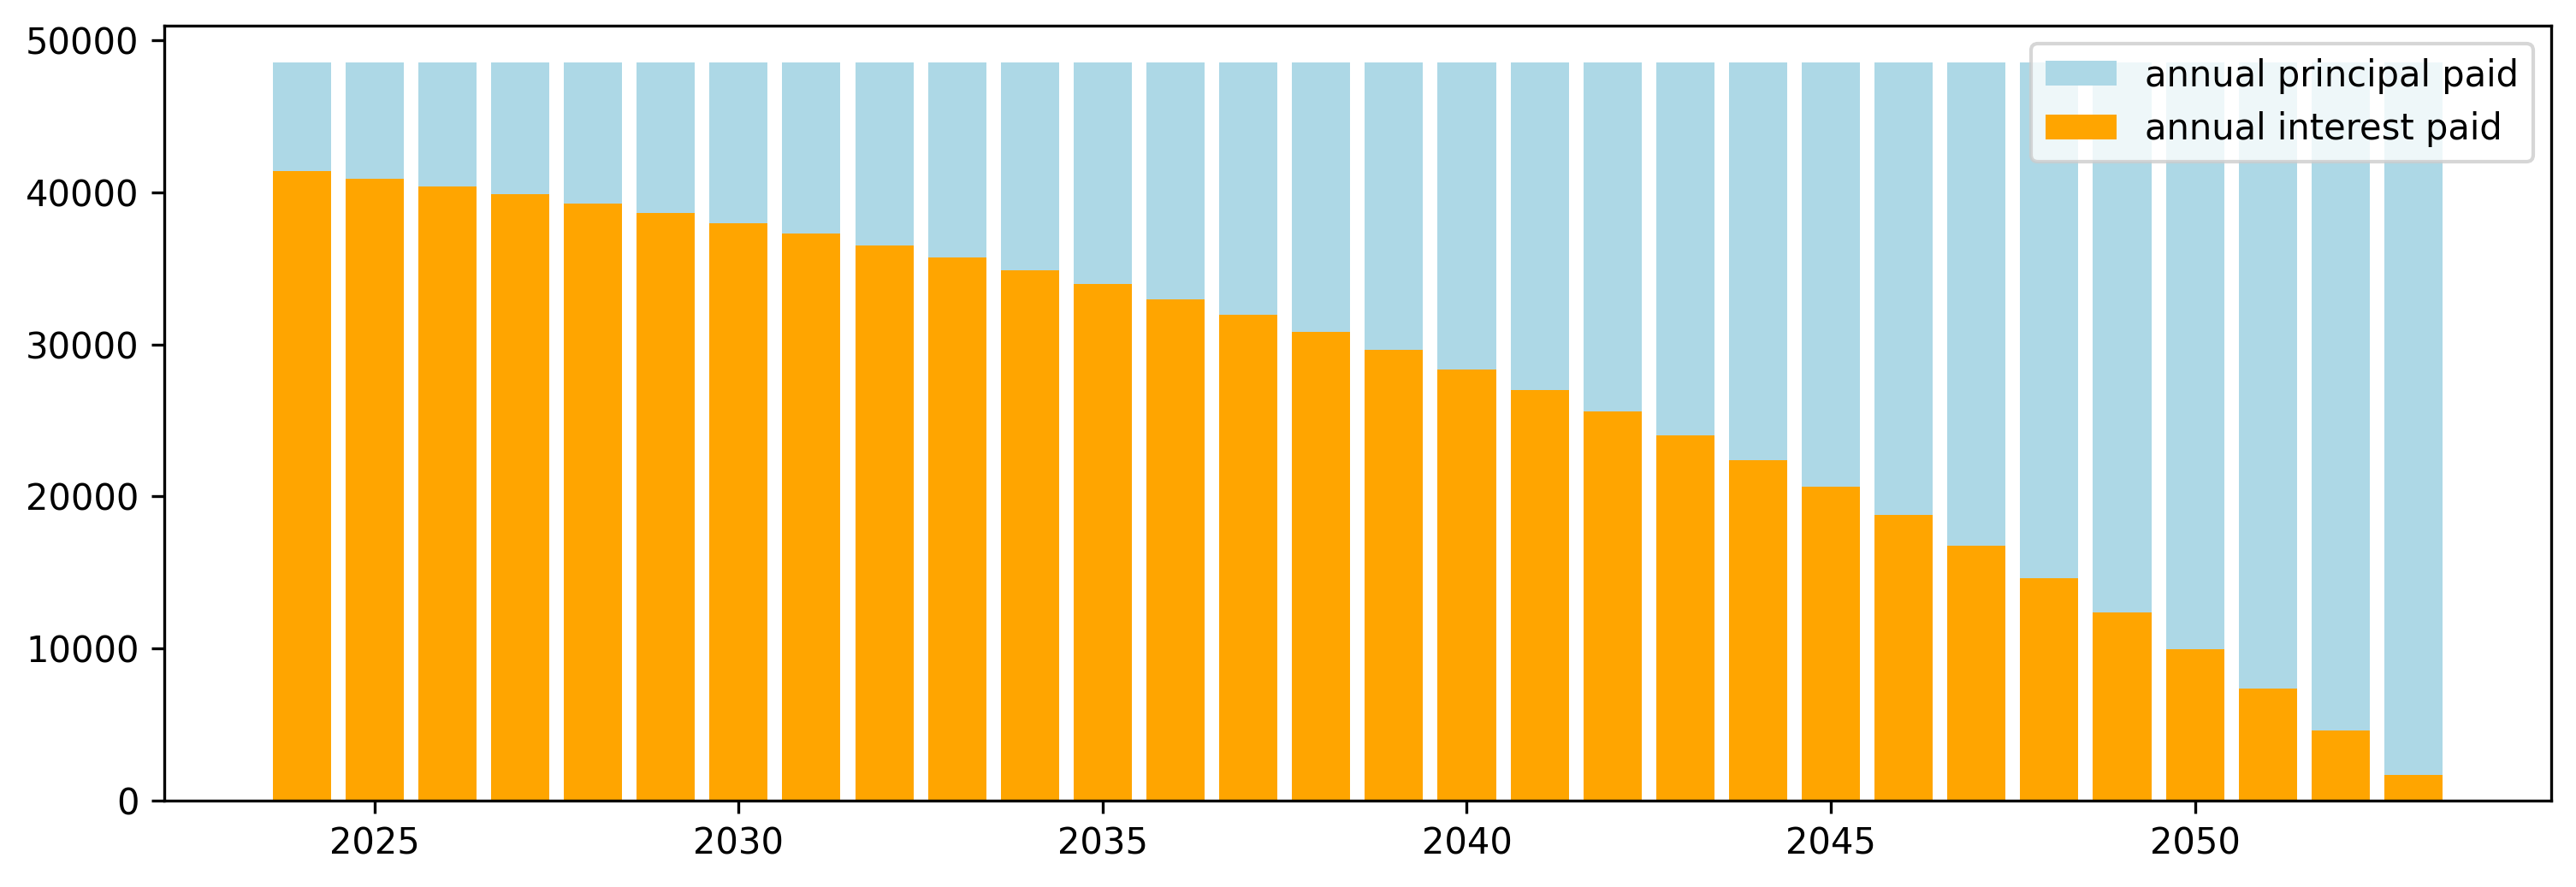

In [9]:
plt.figure(figsize=(12, 4), dpi=300)
plt.bar(df_annual.index, monthly_payment * 12, color='lightblue', label='annual principal paid')
plt.bar(df_annual.index, df_annual.interest, color='orange', label='annual interest paid')
plt.legend()
plt.show()

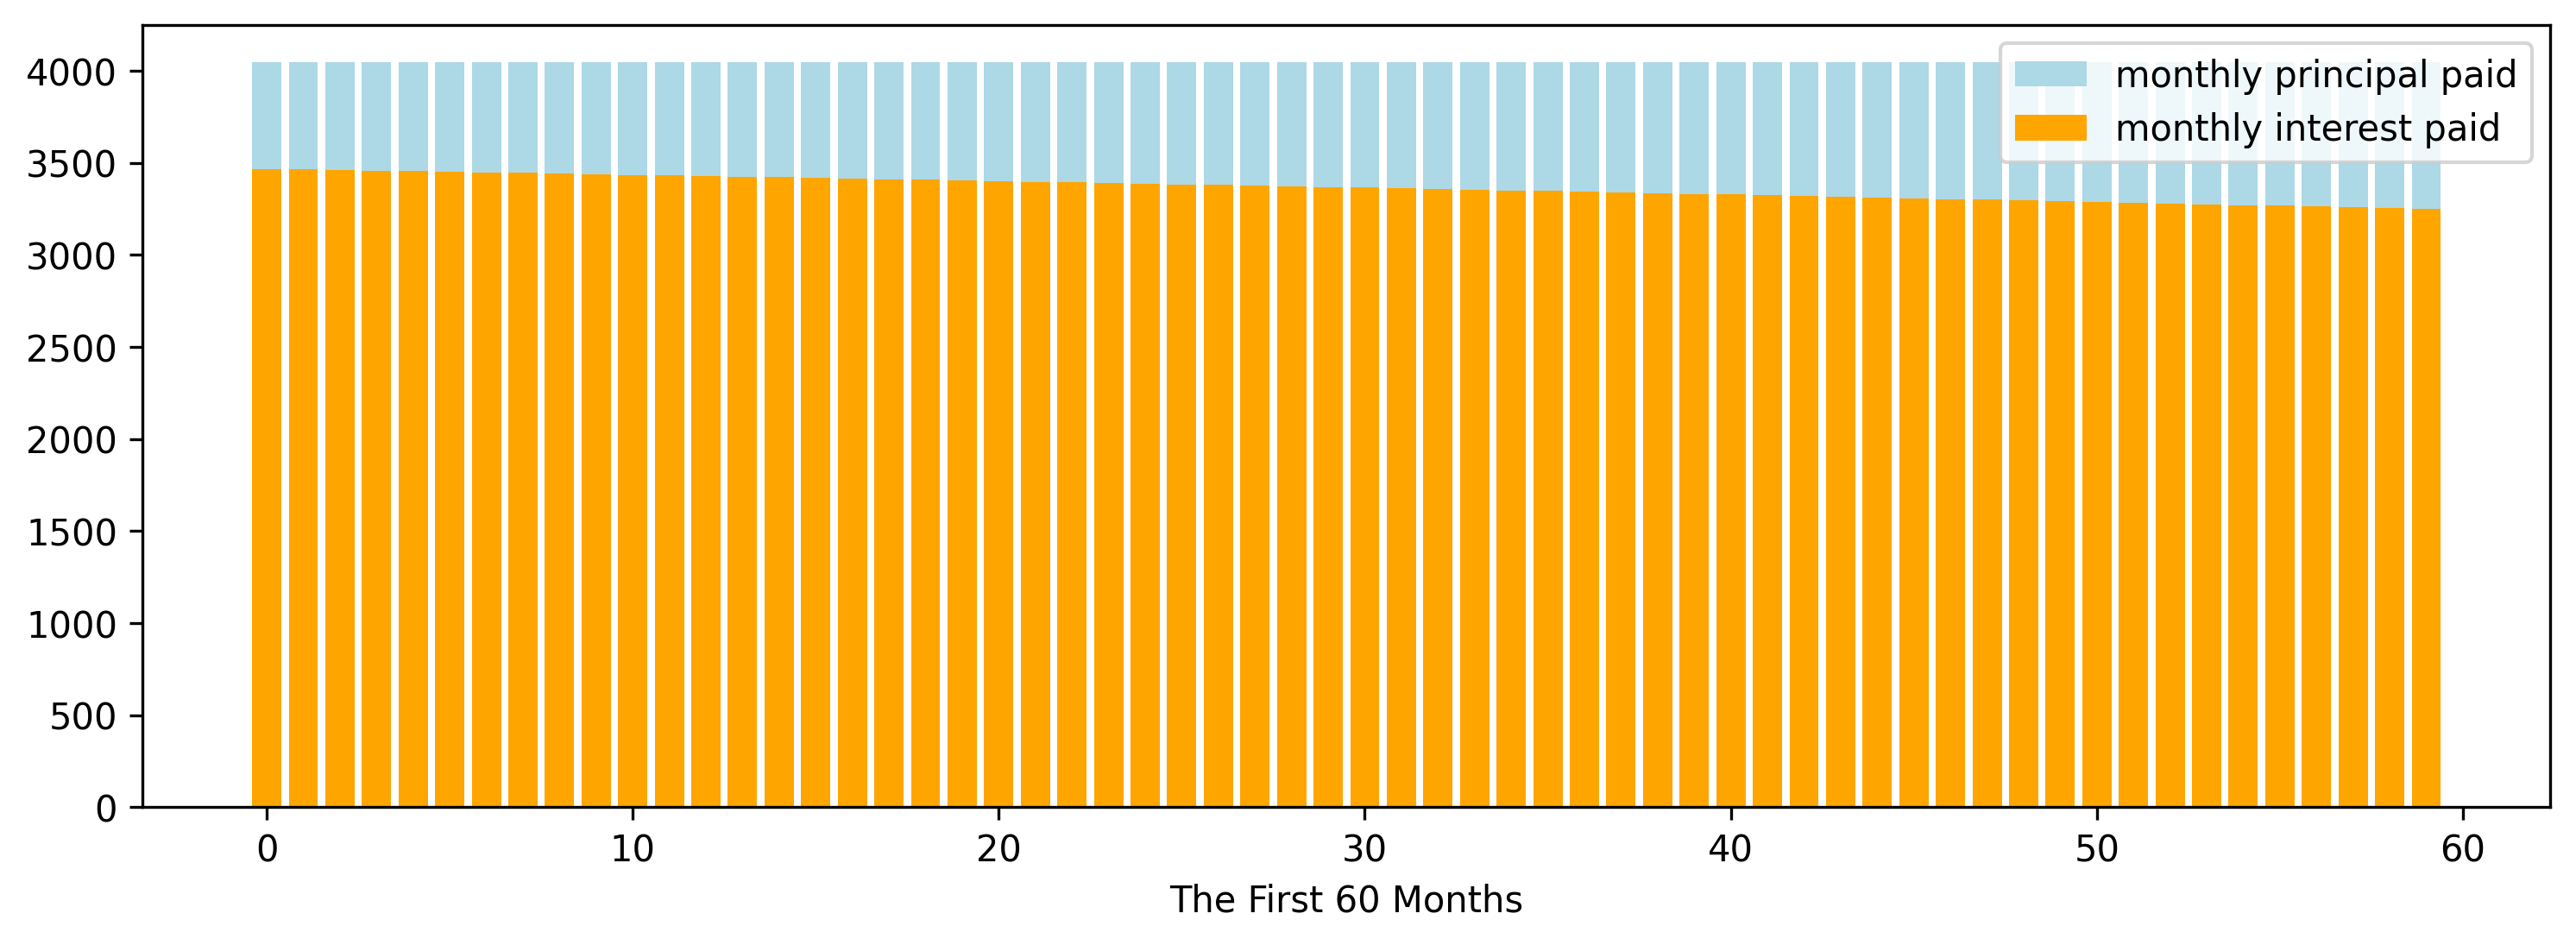

In [10]:
plt.figure(figsize=(12, 4), dpi=300)
plt.bar(df.index[:60], monthly_payment, color='lightblue', label='monthly principal paid')
plt.bar(df.index[:60], df.interest[:60], color='orange', label='monthly interest paid')
plt.xlabel('The First 60 Months')
plt.legend()
plt.show()

### Monthly Payment VS. Interest Rate and Housing Price

Assuming that the housing price is deacreasing with a rate of 0.8%, while the interest rate is increasing with a rate of 3.5%.

In [11]:
def Monthly_Payment(housing_price, down_payment_prop, annual_interest_rate, n):
    init_principal = (1 - down_payment_prop) * housing_price
    monthly_pay = annual_interest_rate/12 * init_principal / ( 1 - (1 + annual_interest_rate/12) ** (-n))

    return monthly_pay

In [12]:
rate_interest = 0.035
rate_housing = 0.015

m = 24
housing_price = [800000] * m
annual_interest_rate = [0.05] * m
monthly_pay = [Monthly_Payment(housing_price[0], down_payment_prop, annual_interest_rate[0], n)] * m
for i in range(1, m):
    housing_price[i] = housing_price[i-1] * (1-rate_housing)
    annual_interest_rate[i] = annual_interest_rate[i-1] * (1+rate_interest)
    monthly_pay[i] = Monthly_Payment(housing_price[i], down_payment_prop, annual_interest_rate[i], n) 

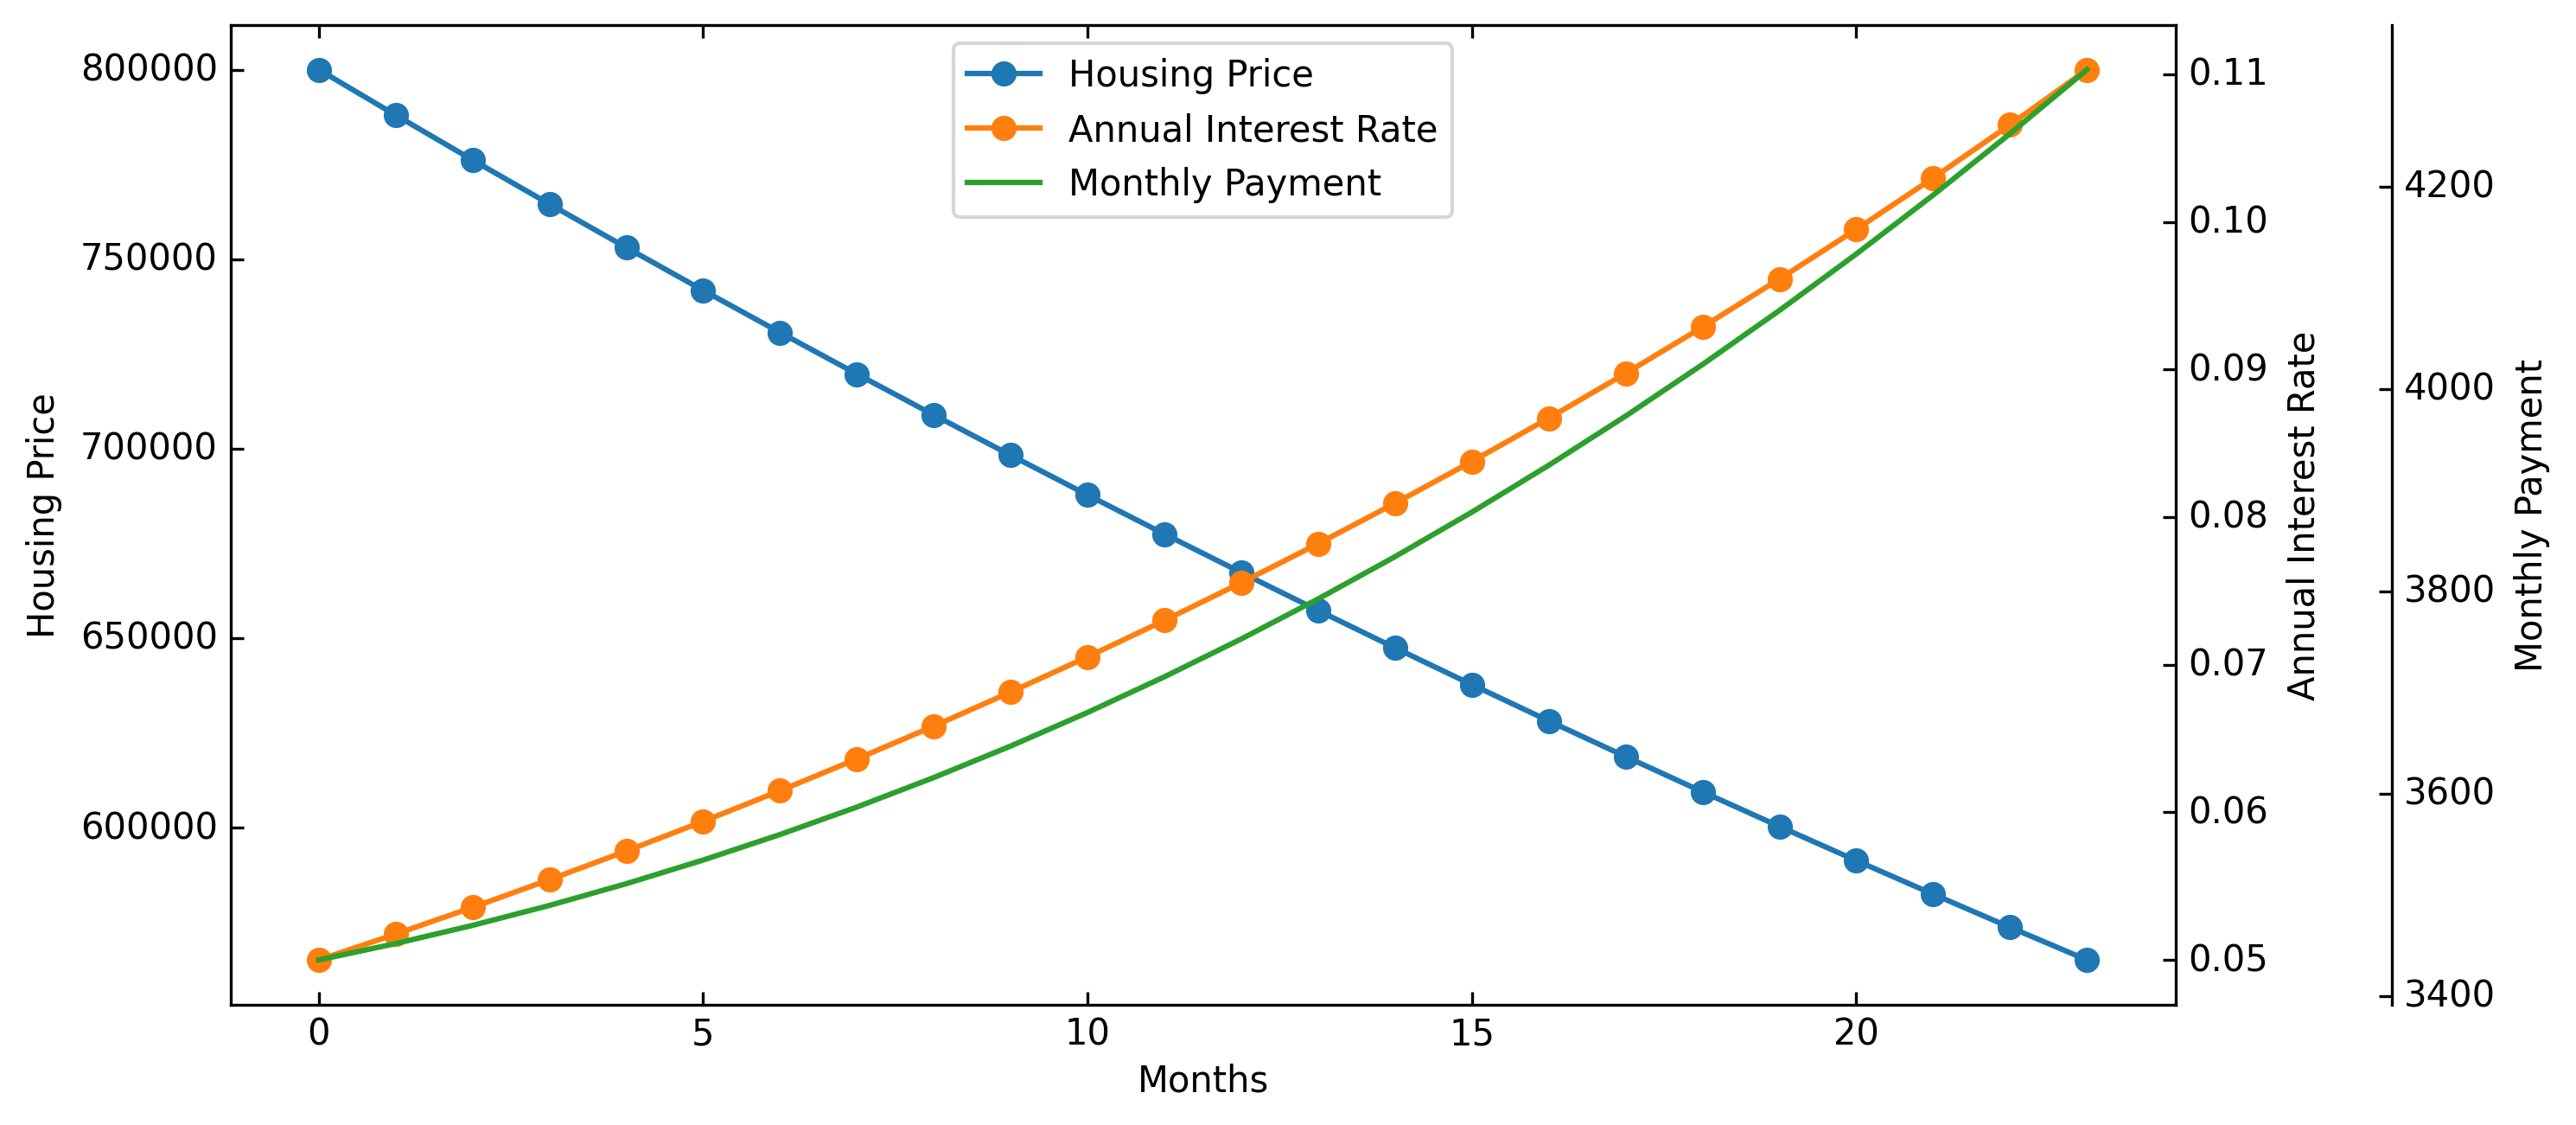

In [13]:
plt.figure(figsize=[12,5], dpi=300) 
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2, offset=(offset, 0))
par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)

host.set_xlabel("Months")
host.set_ylabel("Housing Price")
par1.set_ylabel("Annual Interest Rate")
par2.set_ylabel("Monthly Payment")

p1, = host.plot(housing_price, label="Housing Price", marker="o")
p2, = par1.plot(annual_interest_rate, label="Annual Interest Rate", marker="o")
p3, = par2.plot(monthly_pay, label="Monthly Payment")

host.legend(loc='upper center')

plt.draw()
plt.show()